In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
judge = pd.read_csv("judge.csv")
ohtani = pd.read_csv("ohtani.csv")

In [3]:
pd.set_option('display.max_columns', None)
judge.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2023-09-30,96.1,-2.32,5.65,"Judge, Aaron",592450,679525,single,hit_into_play,NaN,NaN,NaN,NaN,1,Aaron Judge singles on a line drive to left fi...,R,R,R,KC,NYY,X,7.0,line_drive,2,2,2023,-1.00,1.20,-0.73,3.57,NaN,NaN,NaN,1,5,Top,88.89,115.7,NaN,NaN,682515,NaN,NaN,6.478322,-139.834587,-2.649614,-14.521079,29.631801,-16.039062,3.92,1.82,189.0,89.2,17.0,96.5,2516.0,6.4,716375,679525,682515,668472,686681,672580,677951,669004,680118,676369,54.13,0.814,0.771,0.9,1.0,1.0,0.0,4.0,39,5,4-Seam Fastball,2,2,2,2,2,2,2,2,Standard,Standard,225.0,-0.033,0.284
1,CH,2023-09-30,86.8,-2.52,5.50,"Judge, Aaron",592450,679525,NaN,swinging_strike,NaN,NaN,NaN,NaN,14,Aaron Judge singles on a line drive to left fi...,R,R,R,KC,NYY,S,NaN,NaN,2,1,2023,-0.84,0.26,0.12,1.59,NaN,NaN,NaN,1,5,Top,NaN,NaN,NaN,NaN,682515,NaN,NaN,8.081682,-126.258431,-3.776720,-10.529538,22.772574,-28.832400,3.92,1.82,NaN,NaN,NaN,87.7,1772.0,6.6,716375,679525,682515,668472,686681,672580,677951,669004,680118,676369,53.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,4,Changeup,2,2,2,2,2,2,2,2,Standard,Standard,230.0,0.000,-0.048
2,ST,2023-09-30,86.4,-2.35,5.59,"Judge, Aaron",592450,679525,NaN,ball,NaN,NaN,NaN,NaN,14,Aaron Judge singles on a line drive to left fi...,R,R,R,KC,NYY,B,NaN,NaN,1,1,2023,0.56,-0.47,1.68,-1.85,NaN,NaN,NaN,1,5,Top,NaN,NaN,NaN,NaN,682515,NaN,NaN,8.411656,-125.189518,-10.392714,4.032448,27.337008,-35.002444,4.04,1.94,NaN,NaN,NaN,85.6,2414.0,6.2,716375,679525,682515,668472,686681,672580,677951,669004,680118,676369,54.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,3,Sweeper,2,2,2,2,2,2,2,2,Standard,Standard,13.0,0.000,0.034
3,ST,2023-09-30,86.1,-2.52,5.61,"Judge, Aaron",592450,679525,NaN,called_strike,NaN,NaN,NaN,NaN,5,Aaron Judge singles on a line drive to left fi...,R,R,R,KC,NYY,S,NaN,NaN,1,0,2023,0.45,0.01,-0.20,2.78,NaN,NaN,NaN,1,5,Top,NaN,NaN,NaN,NaN,682515,NaN,NaN,4.589976,-125.456401,-0.556599,3.845852,24.017273,-32.177459,4.10,1.92,NaN,NaN,NaN,86.0,2467.0,6.0,716375,679525,682515,668472,686681,672580,677951,669004,680118,676369,54.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,2,Sweeper,2,2,2,2,2,2,2,2,Standard,Standard,47.0,0.000,-0.031
4,FF,2023-09-30,93.8,-2.23,5.70,"Judge, Aaron",592450,679525,NaN,ball,NaN,NaN,NaN,NaN,14,Aaron Judge singles on a line drive to left fi...,R,R,R,KC,NYY,B,NaN,NaN,0,0,2023,-1.01,1.16,1.15,2.28,NaN,NaN,NaN,1,5,Top,NaN,NaN,NaN,NaN,682515,NaN,NaN,10.993940,-136.181945,-5.713150,-14.885835,28.428927,-16.657481,4.17,1.96,NaN,NaN,NaN,94.1,2525.0,6.5,716375,679525,682515,668472,686681,672580,677951,669004,680118,676369,53.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,1,4-Seam Fastball,2,2,2,2,2,2,2,2,Standard,Standard,229.0,0.000,0.025


In [4]:
ohtani.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SL,2023-09-03,88.7,2.17,6.01,"Ohtani, Shohei",660271,666205,field_out,hit_into_play,NaN,NaN,NaN,NaN,6.0,Shohei Ohtani pops out to first baseman Ryan N...,R,L,L,OAK,LAA,X,3.0,popup,3,2,2023,-0.06,0.35,0.43,2.79,NaN,NaN,NaN,2,3,Top,136.81,177.56,NaN,NaN,669127,NaN,NaN,-4.130988,-129.134513,-2.542077,0.220921,28.470833,-27.894079,3.48,1.61,68.0,66.7,74.0,88.8,2073.0,6.4,716731,666205,669127,676116,680869,672478,669397,649557,665923,667670,54.06,0.009,0.01,0.0,1.0,0.0,0.0,3.0,18,6,Slider,0,0,0,0,0,0,0,0,NaN,Standard,134.0,0.011,-0.130
1,CU,2023-09-03,83.9,1.96,6.19,"Ohtani, Shohei",660271,666205,NaN,ball,NaN,NaN,NaN,NaN,13.0,Shohei Ohtani pops out to first baseman Ryan N...,R,L,L,OAK,LAA,B,NaN,NaN,2,2,2023,-0.28,-0.45,-1.27,-0.45,NaN,NaN,NaN,2,3,Top,NaN,NaN,NaN,NaN,669127,NaN,NaN,-6.925936,-121.928621,-8.094346,-1.542127,21.877296,-35.372224,3.56,1.63,NaN,NaN,NaN,84.1,2389.0,6.3,716731,666205,669127,676116,680869,672478,669397,649557,665923,667670,54.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,5,Curveball,0,0,0,0,0,0,0,0,NaN,Standard,346.0,0.000,0.040
2,CU,2023-09-03,82.3,2.01,6.20,"Ohtani, Shohei",660271,666205,NaN,ball,NaN,NaN,NaN,NaN,12.0,Shohei Ohtani pops out to first baseman Ryan N...,R,L,L,OAK,LAA,B,NaN,NaN,1,2,2023,-0.50,-0.77,2.03,2.74,NaN,NaN,NaN,2,3,Top,NaN,NaN,NaN,NaN,669127,NaN,NaN,1.003315,-119.959474,0.150597,-5.043700,23.388402,-39.871527,3.48,1.63,NaN,NaN,NaN,82.2,2341.0,6.1,716731,666205,669127,676116,680869,672478,669397,649557,665923,667670,54.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,4,Curveball,0,0,0,0,0,0,0,0,NaN,Standard,326.0,0.000,0.016
3,FF,2023-09-03,94.3,1.92,6.02,"Ohtani, Shohei",660271,666205,NaN,foul,NaN,NaN,NaN,NaN,2.0,Shohei Ohtani pops out to first baseman Ryan N...,R,L,L,OAK,LAA,S,NaN,NaN,1,1,2023,0.57,1.21,0.04,3.13,NaN,NaN,NaN,2,3,Top,NaN,NaN,NaN,NaN,669127,NaN,NaN,-6.181099,-137.311876,-4.558369,8.528898,27.193432,-16.067094,3.48,1.61,157.0,84.1,70.0,94.9,2364.0,6.3,716731,666205,669127,676116,680869,672478,669397,649557,665923,667670,54.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,3,4-Seam Fastball,0,0,0,0,0,0,0,0,NaN,Standard,142.0,0.000,-0.027
4,FF,2023-09-03,93.9,2.07,5.83,"Ohtani, Shohei",660271,666205,NaN,swinging_strike,NaN,NaN,NaN,NaN,6.0,Shohei Ohtani pops out to first baseman Ryan N...,R,L,L,OAK,LAA,S,NaN,NaN,1,0,2023,0.73,1.11,0.79,2.43,NaN,NaN,NaN,2,3,Top,NaN,NaN,NaN,NaN,669127,NaN,NaN,-4.931319,-136.714104,-5.615766,10.142440,27.204437,-17.201111,3.48,1.61,NaN,NaN,NaN,94.7,2371.0,6.5,716731,666205,669127,676116,680869,672478,669397,649557,665923,667670,53.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,2,4-Seam Fastball,0,0,0,0,0,0,0,0,NaN,Standard,136.0,0.000,-0.022


In [6]:
print("Aaron Judge batted ball event totals, 2023:")
print(judge['events'].value_counts())
print("\nShohei Ohtani batted ball event totals, 2023:")
print(ohtani['events'].value_counts())

Aaron Judge batted ball event totals, 2023:
strikeout                    130
field_out                    127
walk                          79
single                        45
home_run                      37
double                        16
grounded_into_double_play      5
force_out                      4
sac_fly                        3
fielders_choice                2
field_error                    1
Name: events, dtype: int64

Shohei Ohtani batted ball event totals, 2023:
field_out                    178
strikeout                    143
single                        73
walk                          68
home_run                      44
double                        26
force_out                     14
grounded_into_double_play      9
triple                         8
catcher_interf                 5
hit_by_pitch                   3
sac_fly                        3
fielders_choice_out            1
field_error                    1
Name: events, dtype: int64


Text(0.5, 1.0, 'Shohei Ohtani\nHome Runs, 2023')

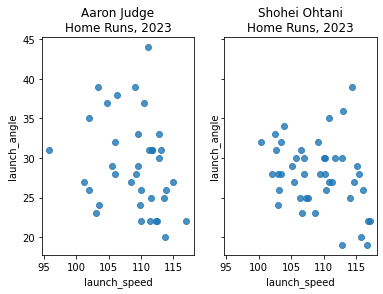

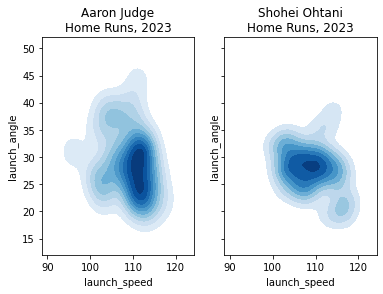

In [7]:
# Filter to include home runs only
judge_hr = judge[judge["events"]=="home_run"]
ohtani_hr = ohtani[ohtani["events"]=="home_run"]

# Create a figure with two scatter plots of launch speed vs. launch angle, one for each player's home runs
fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x=judge_hr["launch_speed"], y=judge_hr["launch_angle"], fit_reg=False, color='tab:blue', data=..., ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2023')
sns.regplot(x=ohtani_hr["launch_speed"], y=ohtani_hr["launch_angle"], fit_reg=False, color='tab:blue', data=..., ax=axs1[1]).set_title('Shohei Ohtani\nHome Runs, 2023')

# Create a figure with two KDE plots of launch speed vs. launch angle, one for each player's home runs
fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_hr["launch_speed"], judge_hr["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2023')
sns.kdeplot(ohtani_hr["launch_speed"], ohtani_hr["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Shohei Ohtani\nHome Runs, 2023')

Text(0.5, 1.0, 'Home Runs, 2023')

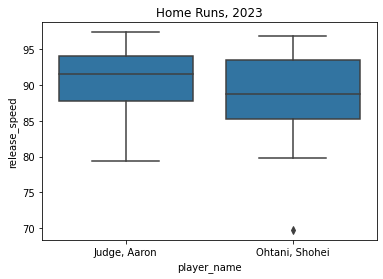

In [8]:
# Combine the Judge and Ohtani home run DataFrames for easy boxplot plotting
judge_ohtani_hr = pd.concat([judge_hr,ohtani_hr])

# Create a boxplot that describes the pitch velocity of each player's home runs
sns.boxplot(data=judge_ohtani_hr, x="player_name", y="release_speed", color='tab:blue').set_title('Home Runs, 2023')

In [9]:
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1., 4., 7.]:
        return 1
    # Middle third of strike zone
    if row.zone in [2., 5., 8.]:
        return 2
    # Right third of strike zone
    if row.zone in [3., 6., 9.]:
        return 3

In [10]:
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1., 2., 3.]:
        return 3
    # Middle third of strike zone
    if row.zone in [4., 5., 6.]:
        return 2
    # Lower third of strike zone
    if row.zone in [7., 8., 9.]:
        return 1

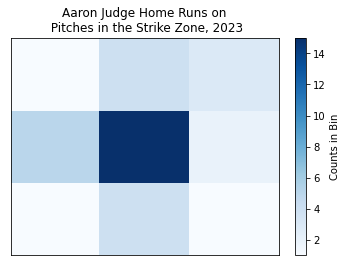

In [11]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
judge_strike_hr = judge_hr.copy().loc[judge_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Judge home runs
judge_strike_hr['zone_x'] = judge_strike_hr.apply(assign_x_coord, axis=1)
judge_strike_hr['zone_y'] = judge_strike_hr.apply(assign_y_coord, axis=1)

# Plot Judge's home run zone as a 2D histogram with a colorbar
plt.hist2d(judge_strike_hr['zone_x'], judge_strike_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('Aaron Judge Home Runs on\n Pitches in the Strike Zone, 2023')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

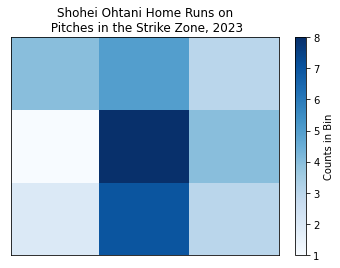

In [13]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
ohtani_strike_hr = ohtani_hr.copy().loc[ohtani_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Judge home runs
ohtani_strike_hr['zone_x'] = ohtani_strike_hr.apply(assign_x_coord, axis=1)
ohtani_strike_hr['zone_y'] = ohtani_strike_hr.apply(assign_y_coord, axis=1)

# Plot Judge's home run zone as a 2D histogram with a colorbar
plt.hist2d(ohtani_strike_hr['zone_x'], ohtani_strike_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('Shohei Ohtani Home Runs on\n Pitches in the Strike Zone, 2023')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')